In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('walmart.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0


## 1. Defining Problem Statement and Analyzing basic metrics 

### 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [447]:
df.shape

(500863, 10)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500863 entries, 0 to 500862
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     500863 non-null  int64  
 1   Product_ID                  500863 non-null  object 
 2   Gender                      500863 non-null  object 
 3   Age                         500863 non-null  object 
 4   Occupation                  500863 non-null  int64  
 5   City_Category               500863 non-null  object 
 6   Stay_In_Current_City_Years  500862 non-null  object 
 7   Marital_Status              500862 non-null  float64
 8   Product_Category            500862 non-null  float64
 9   Purchase                    500862 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 38.2+ MB


In [449]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.008630e+05,500863,500863,500863,500863.000000,500863,500862,500862.000000,500862.000000,500862.000000
unique,NaN,3612,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1712,377678,199687,NaN,211065,176309,NaN,NaN,NaN
mean,1.002998e+06,NaN,NaN,NaN,8.082593,NaN,NaN,0.409033,5.298599,9331.412173
std,1.714654e+03,NaN,NaN,NaN,6.524053,NaN,NaN,0.491656,3.751217,4980.083494
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,185.000000
25%,1.001497e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5866.000000
50%,1.003037e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8061.000000
75%,1.004430e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12070.000000


In [450]:
df['User_ID'].nunique()

5891

In [451]:
df['Product_ID'].nunique()

3612

## Observations:
1. We can see that there are 500863 rows and 10 columns in the data. We're assuming this is a sample data since we have to perform the analysis for 500k Males and 500k Females. We will create more samples from this sample.
2. We can see that there are 5891 unique users in the dataset.
3. There are 3612 unique products in this dataset.
4. The categorical features are - Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category.
5. We can see that there more Male customers in the data than the Female customers.
6. The top City category is B with frequency of 21k. 

### 1.2 Non-Graphical Analysis: Value counts and unique attributes ​

In [452]:
df['Gender'].value_counts(normalize = True)

M    0.754055
F    0.245945
Name: Gender, dtype: float64

In [453]:
df['Gender'].value_counts()

M    377678
F    123185
Name: Gender, dtype: int64

In [454]:
df.groupby(['Gender'])[['User_ID']].nunique()

,User_ID
Gender,
F,1666
M,4225


In [455]:
df.groupby(['Gender'])[['User_ID','Purchase']].agg({'User_ID' : 'nunique','Purchase' : 'sum'})

,User_ID,Purchase
Gender,,
F,1666,1.084869e+09
M,4225,3.588881e+09


In [456]:
cat_columns = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status', 'Product_Category']


In [457]:
df[cat_columns].melt().groupby(['variable','value'])[['value']].count()/len(df)*100

value
variable                   value           
Age                        0-17    2.740270
                           18-25  18.163450
                           26-35  39.868587
                           36-45  20.033622
                           46-50   8.285899
                           51-55   7.012496
                           55+     3.895676
City_Category              A      26.888990
                           B      42.140266
                           C      30.970744
Gender                     F      24.594550
                           M      75.405450
Marital_Status             0      59.096599
                           1      40.903201
Occupation                 0      12.657952
                           1       8.545650
                           2       4.835454
                           3       3.222638
                           4      13.197022
                           5       2.217572
                           6       3.712392
                           7      10.724290
                           8       0.282313
                           9       1.147819
                           10      2.345751
                           11      2.113352
                           12      5.647452
                           13      1.408169
                           14      4.963832
                           15      2.190220
                           16      4.633602
                           17      7.269653
                           18      1.214703
                           19      1.550923
                           20      6.119238
Product_Category           1      25.691656
                           2       4.375648
                           3       3.696620
                           4       2.157876
                           5      27.649477
                           6       3.741542
                           7       0.681424
                           8      20.878164
                           9       0.074471
                           10      0.938580
                           11      4.459902
                           12      0.723551
                           13      1.012053
                           14      0.276722
                           15      1.153010
                           16      1.809277
                           17      0.106217
                           18      0.573610
Stay_In_Current_City_Years 0      13.539631
                           1      35.201043
                           2      18.513246
                           3      17.331286
                           4+     15.414594

## Observations:
1. We can see that there are 75% of the male customers in the data and 25% of the female customers.
2. We can also see that the Male customers have purchased more products from Walmart than the Female customers.
3. We can also observe that the 40% of the customers are from the Age range of 26-35. The second highest is 20% for 36-45 Age range.
4. We can see that 40% of the customers are from the city category of B and 30% of the customers are from category is C.
5. From the data we can see that 59% of the customers are single.
6. Highest product sold is of Product Category 5 with 55.2% sales. Second highest product sold is of Product Category 1 with 51.3%

### 1.3 Visual Analysis - Univariate & Bivariate

In [458]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0


### Univariate Analysis

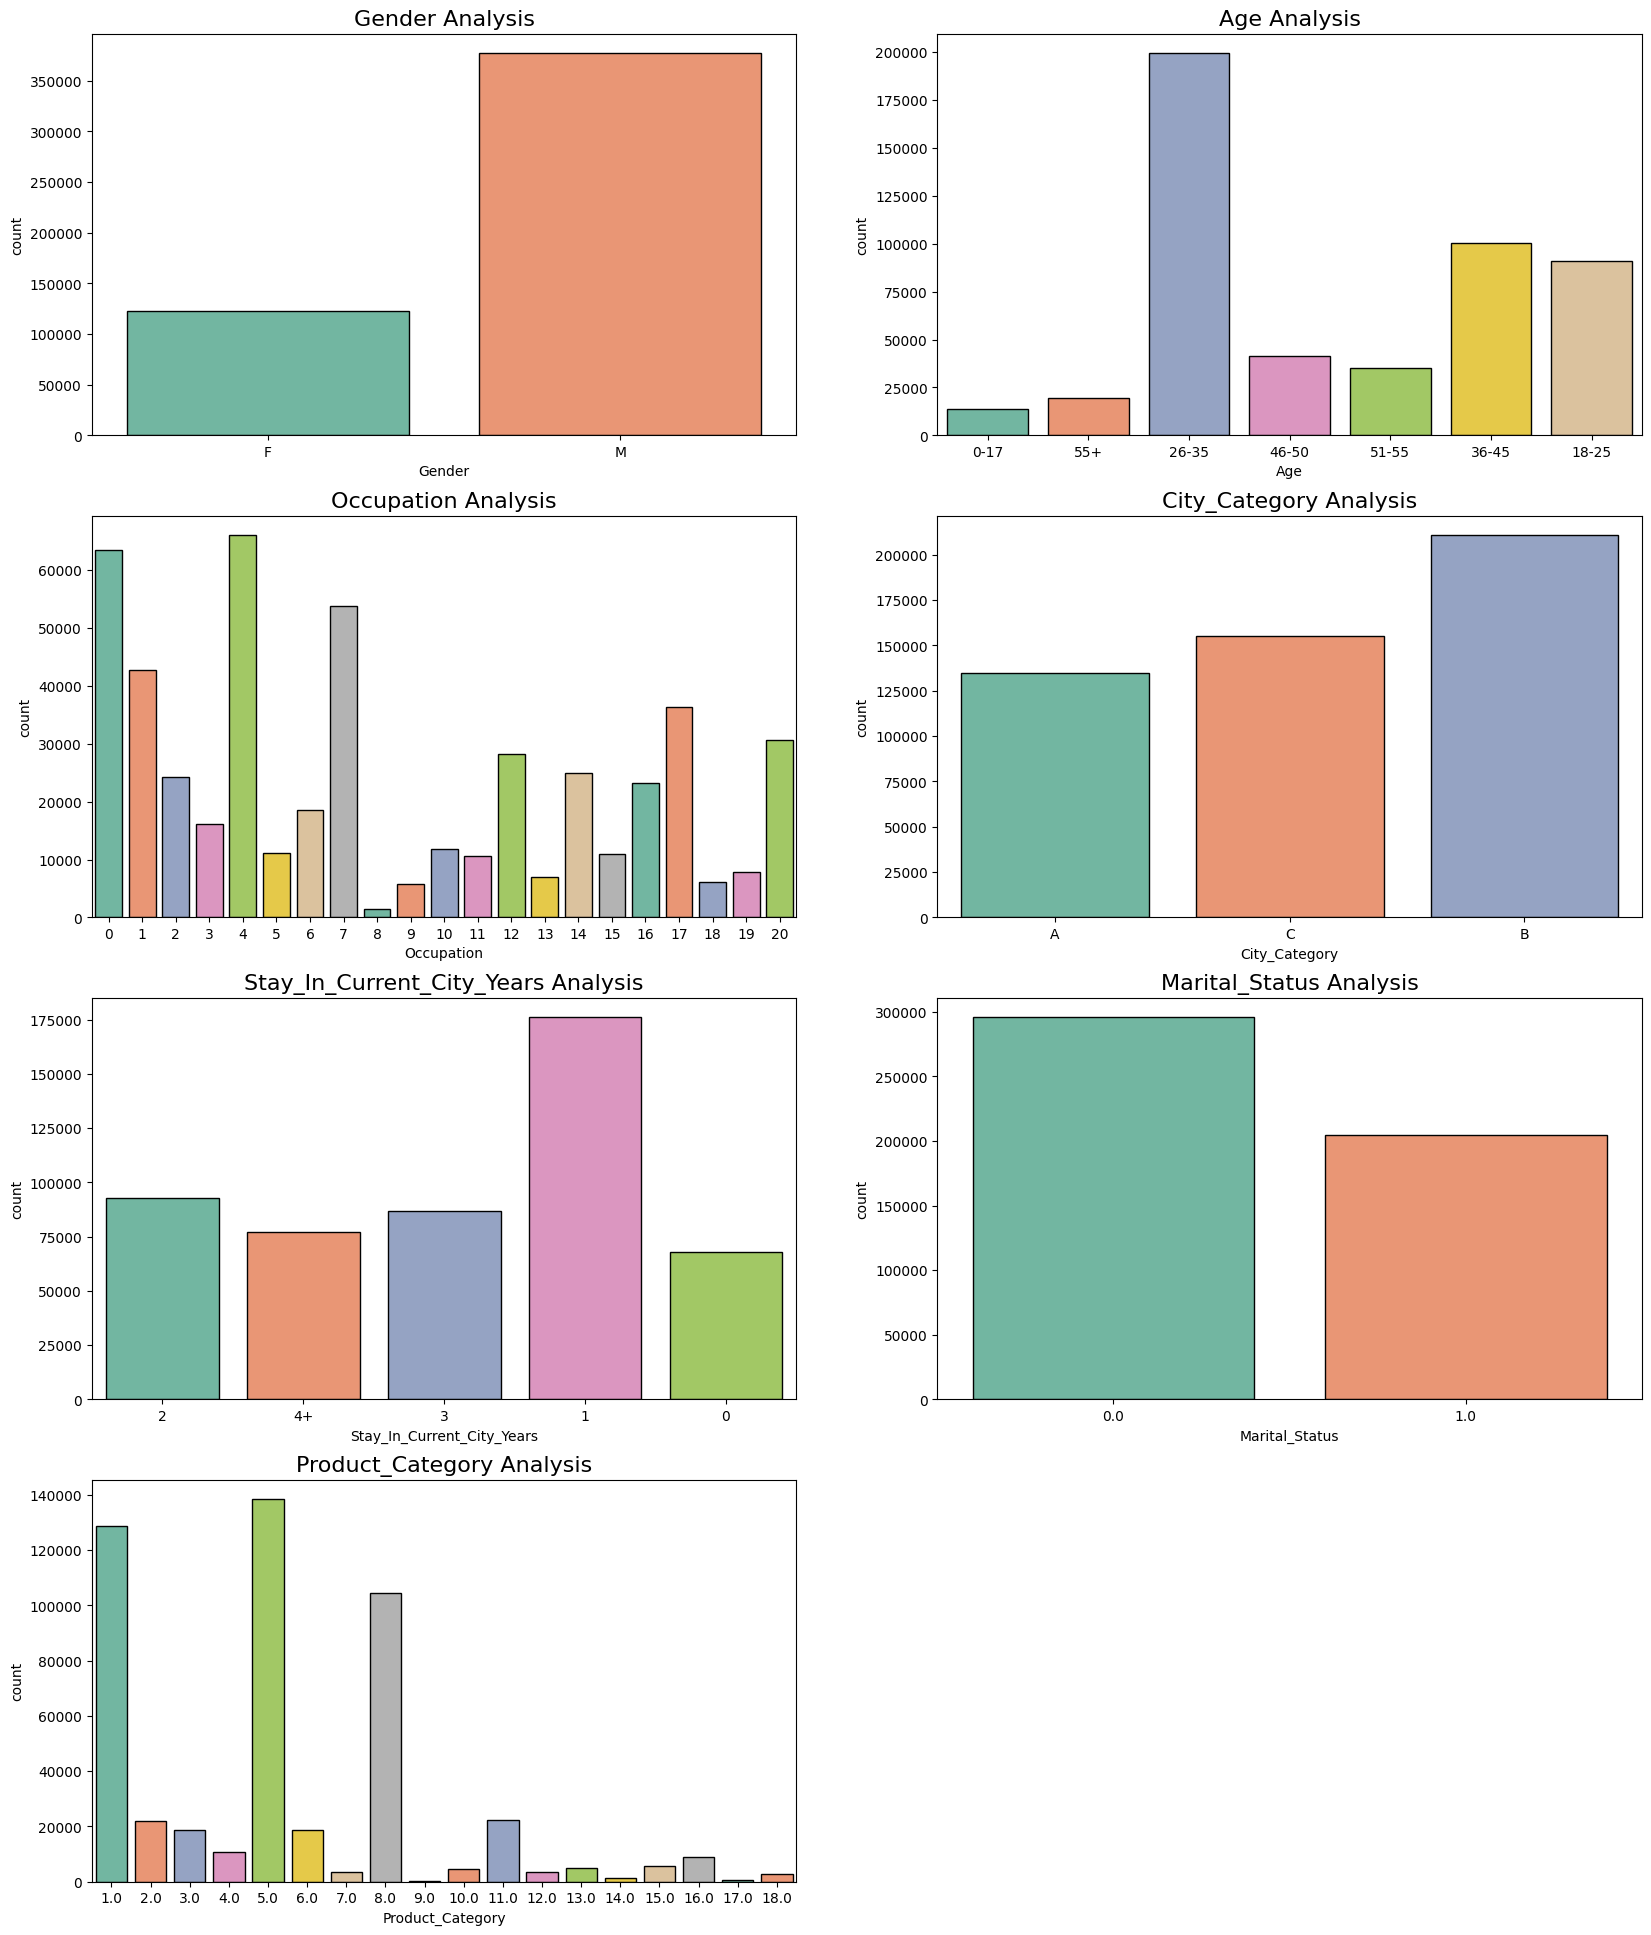

In [459]:
plt.figure(figsize = (20,24))
count = 0
for i in range(len(cat_columns)):
    plt.subplot(4,2,i+1)
    sns.countplot(data = df, x = cat_columns[i], palette = 'Set2', edgecolor = 'black')
    plt.title(f'{cat_columns[count]} Analysis', fontsize = 16)
    count += 1
    

### Bi-Variate Analysis

In [460]:
product_purchased = df.groupby(['Product_Category'])[['Purchase']].sum()

product_purchased = product_purchased.reset_index()

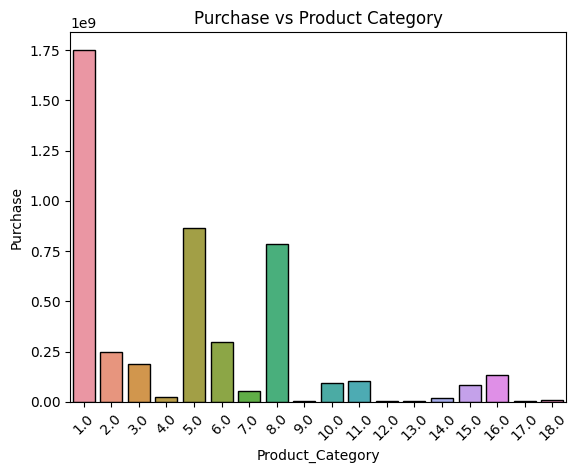

In [461]:
sns.barplot(data = product_purchased, x = 'Product_Category', y = 'Purchase', edgecolor = 'black')
plt.title('Purchase vs Product Category')
plt.xticks(rotation = 45)
plt.show()

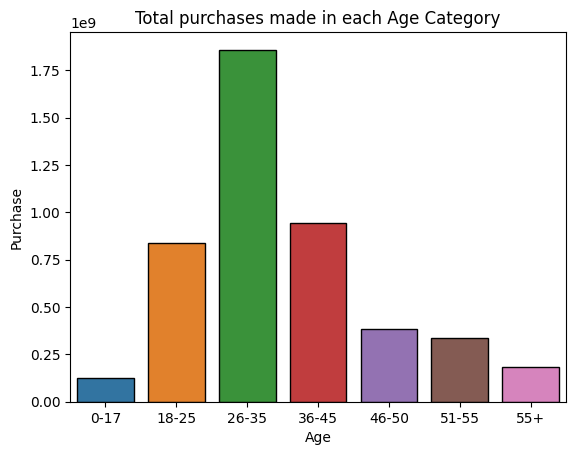

In [462]:
age_purchase = df.groupby(['Age'])[['Purchase']].sum()

age_purchase = age_purchase.reset_index()

sns.barplot(data = age_purchase, x = 'Age', y = 'Purchase', edgecolor = 'black')
plt.title('Total purchases made in each Age Category')
plt.show()

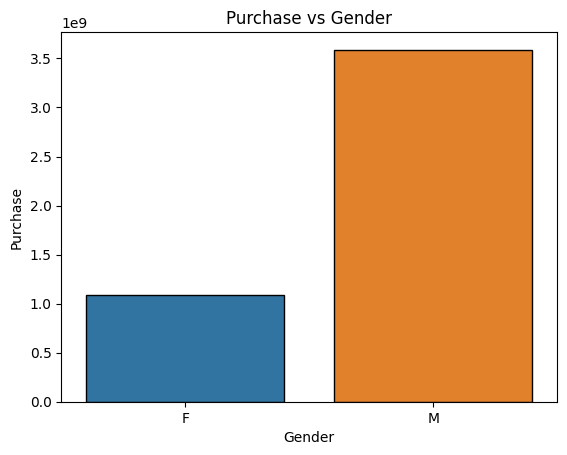

In [463]:
gender_purchase = df.groupby(['Gender'])[['Purchase']].sum()

gender_purchase = gender_purchase.reset_index()

sns.barplot(data = gender_purchase, x = 'Gender', y = 'Purchase', edgecolor = 'black')
plt.title('Purchase vs Gender')
plt.show()

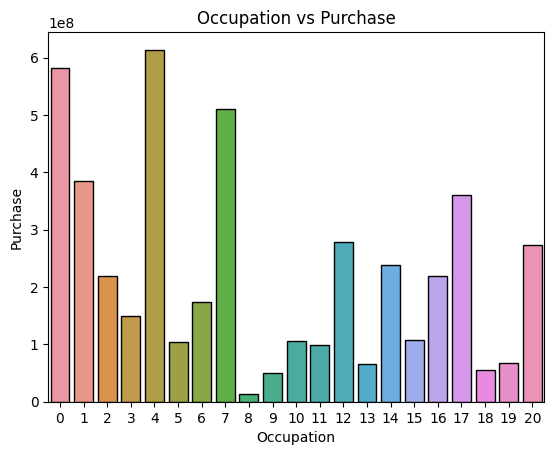

In [464]:
purchase_occupation = df.groupby(['Occupation'])[['Purchase']].sum()

purchase_occupation = purchase_occupation.reset_index()

sns.barplot(data = purchase_occupation, y = 'Purchase', x = 'Occupation', edgecolor = 'black')
plt.title('Occupation vs Purchase')
plt.show()

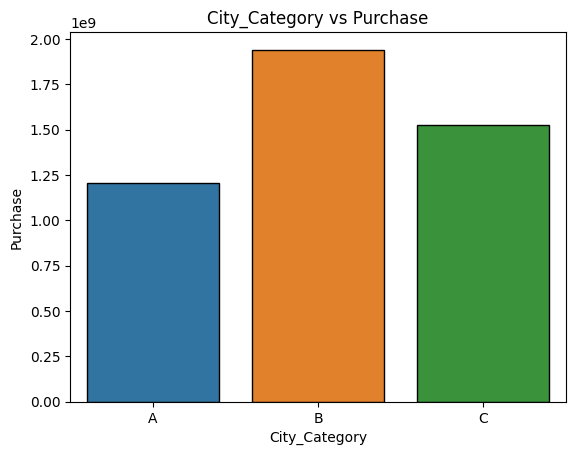

In [465]:
citycat_purchase = df.groupby(['City_Category'])[['Purchase']].sum()

citycat_purchase = citycat_purchase.reset_index()

sns.barplot(data = citycat_purchase, x = 'City_Category', y = 'Purchase', edgecolor = 'black')
plt.title('City_Category vs Purchase')
plt.show()

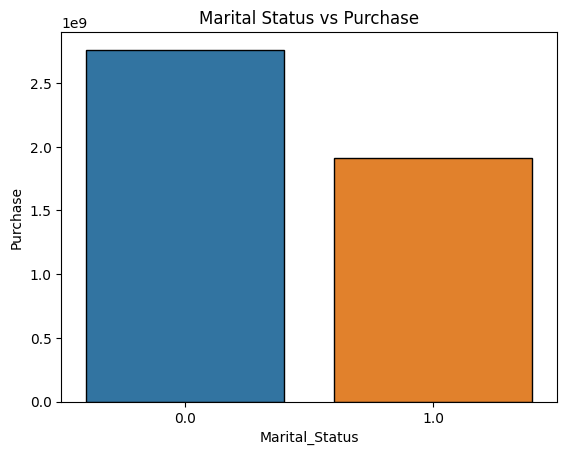

In [466]:
maritalstat_purchase = df.groupby(['Marital_Status'])[['Purchase']].sum()

maritalstat_purchase = maritalstat_purchase.reset_index()

sns.barplot(data = maritalstat_purchase, x = 'Marital_Status', y = 'Purchase', edgecolor = 'black')
plt.title('Marital Status vs Purchase')
plt.show()

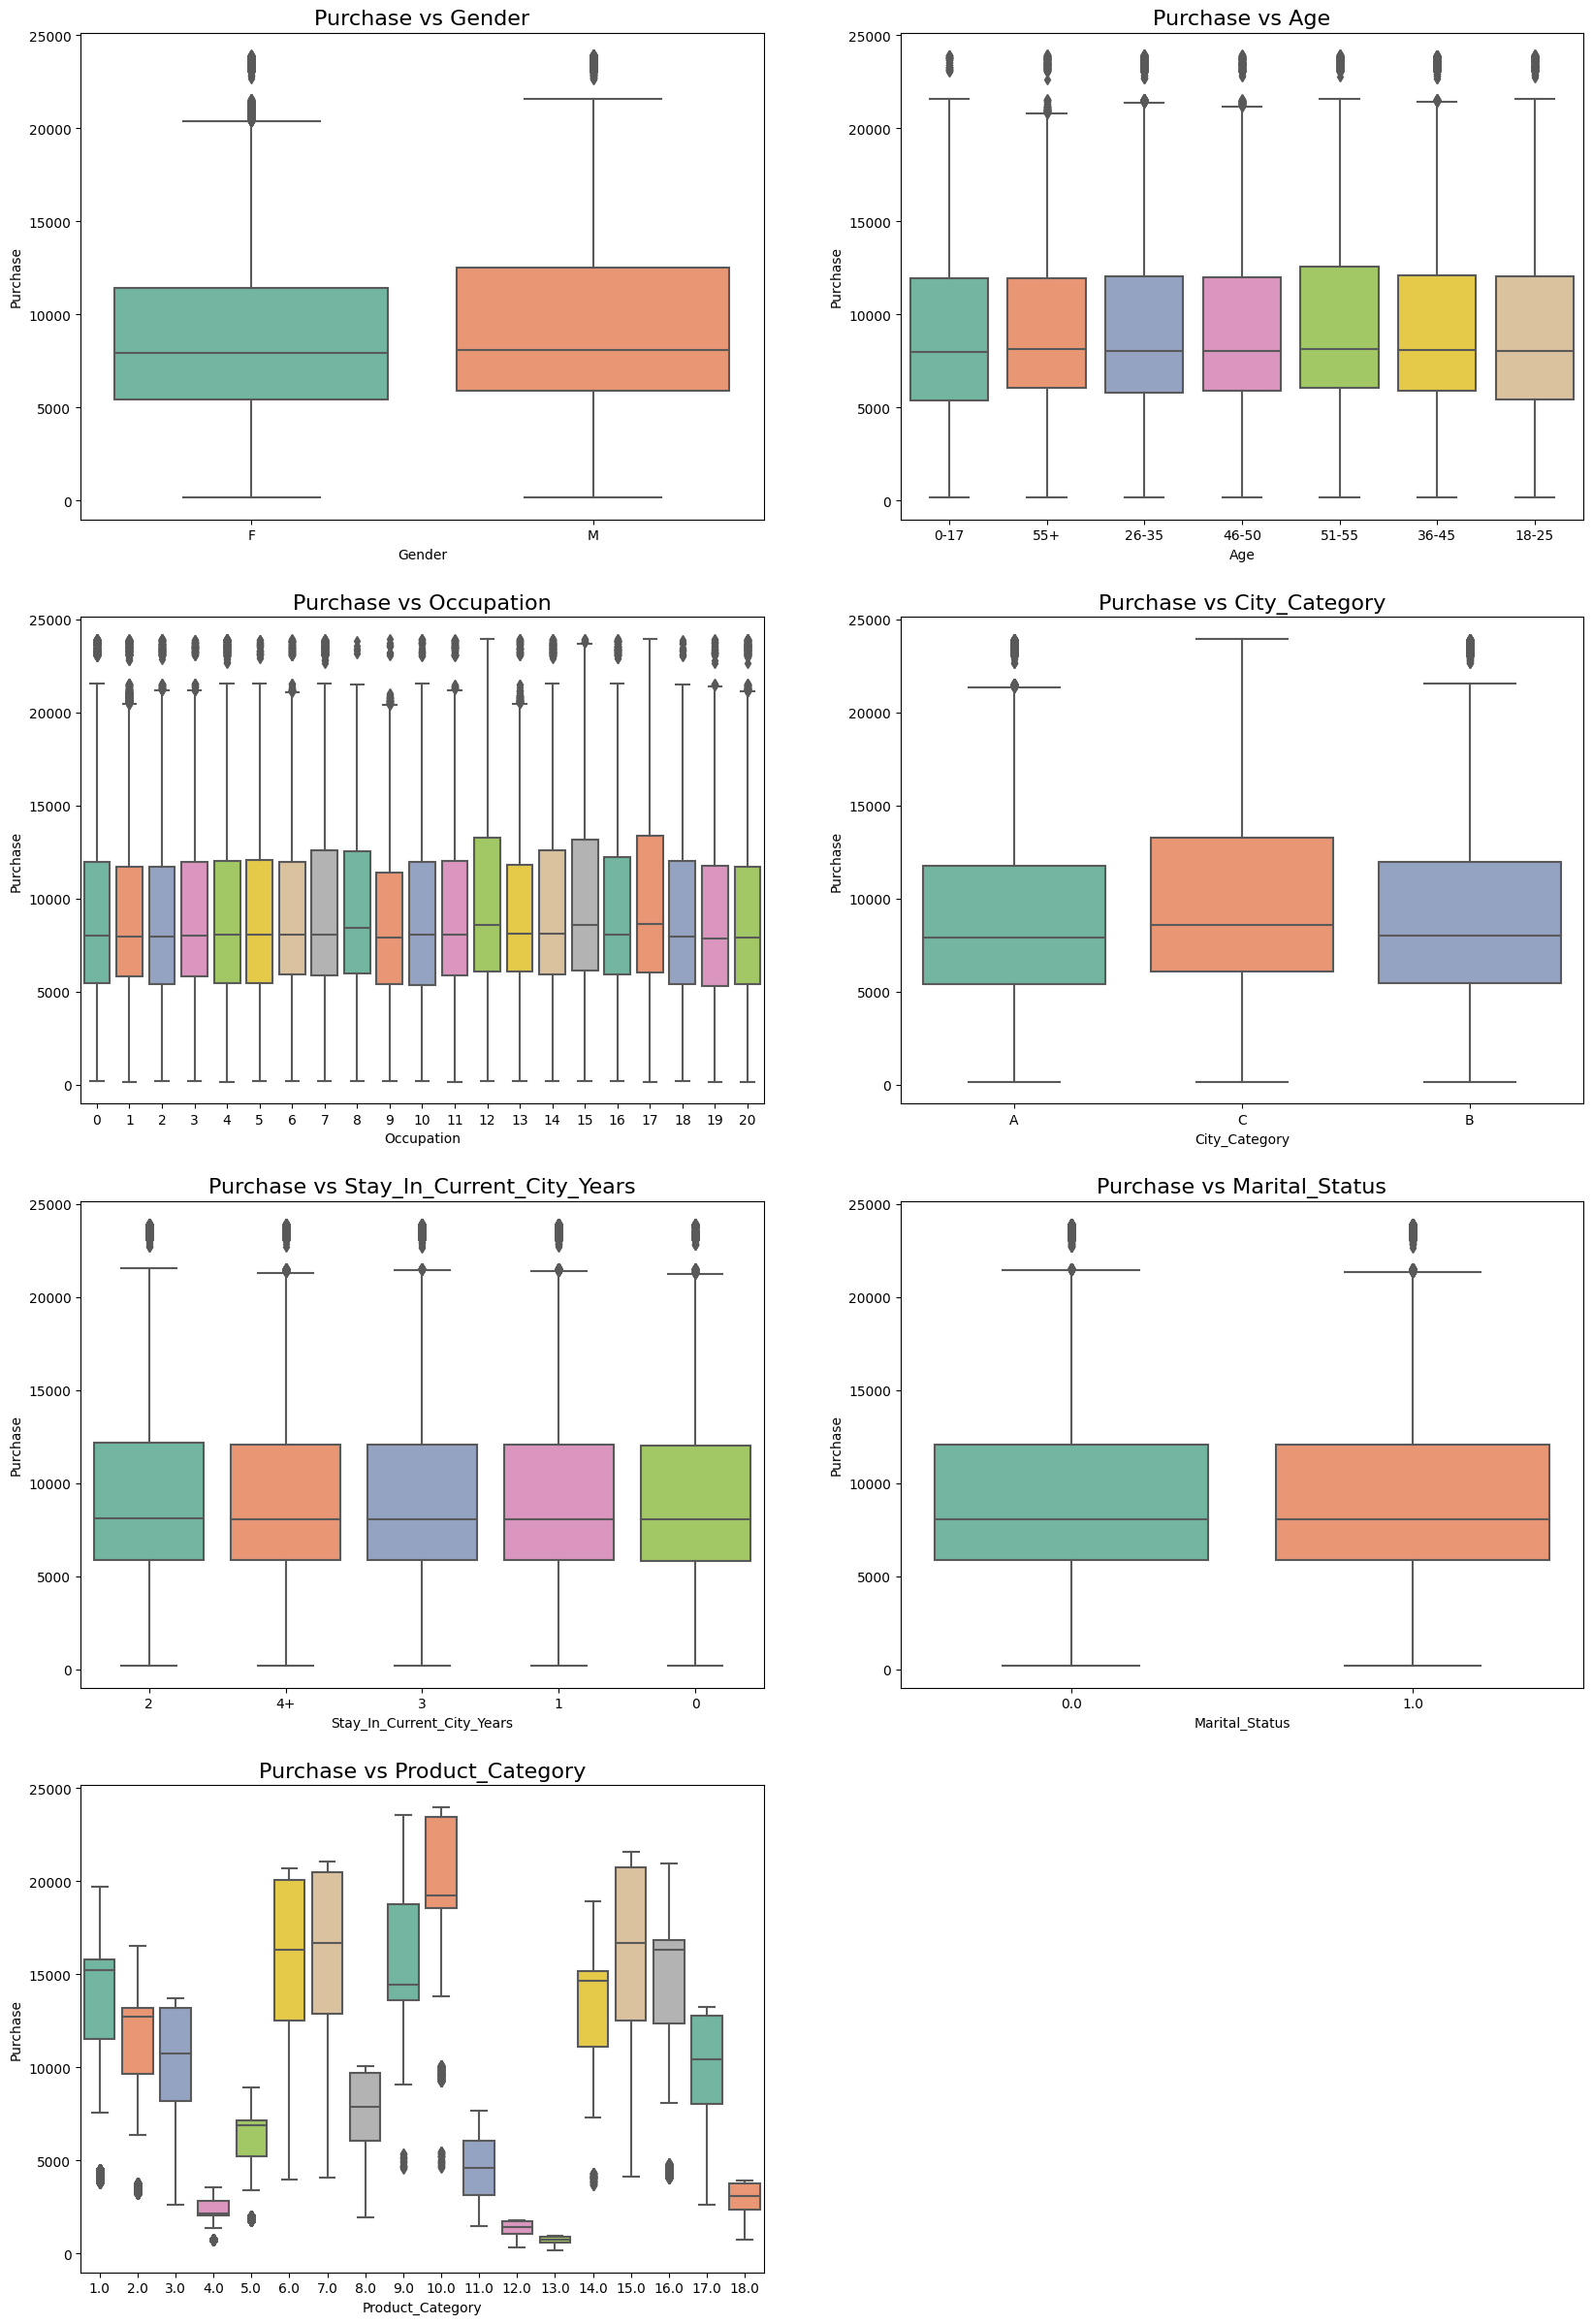

In [467]:
plt.figure(figsize = (20,30))
count = 0
for i in range(len(cat_columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data = df, x = cat_columns[i], y= 'Purchase', palette = 'Set2')
    plt.title(f'Purchase vs {cat_columns[count]}', fontsize = 16)
    count += 1
    

In [468]:
df['User_ID'].nunique()

5891

### Multivariate Analysis

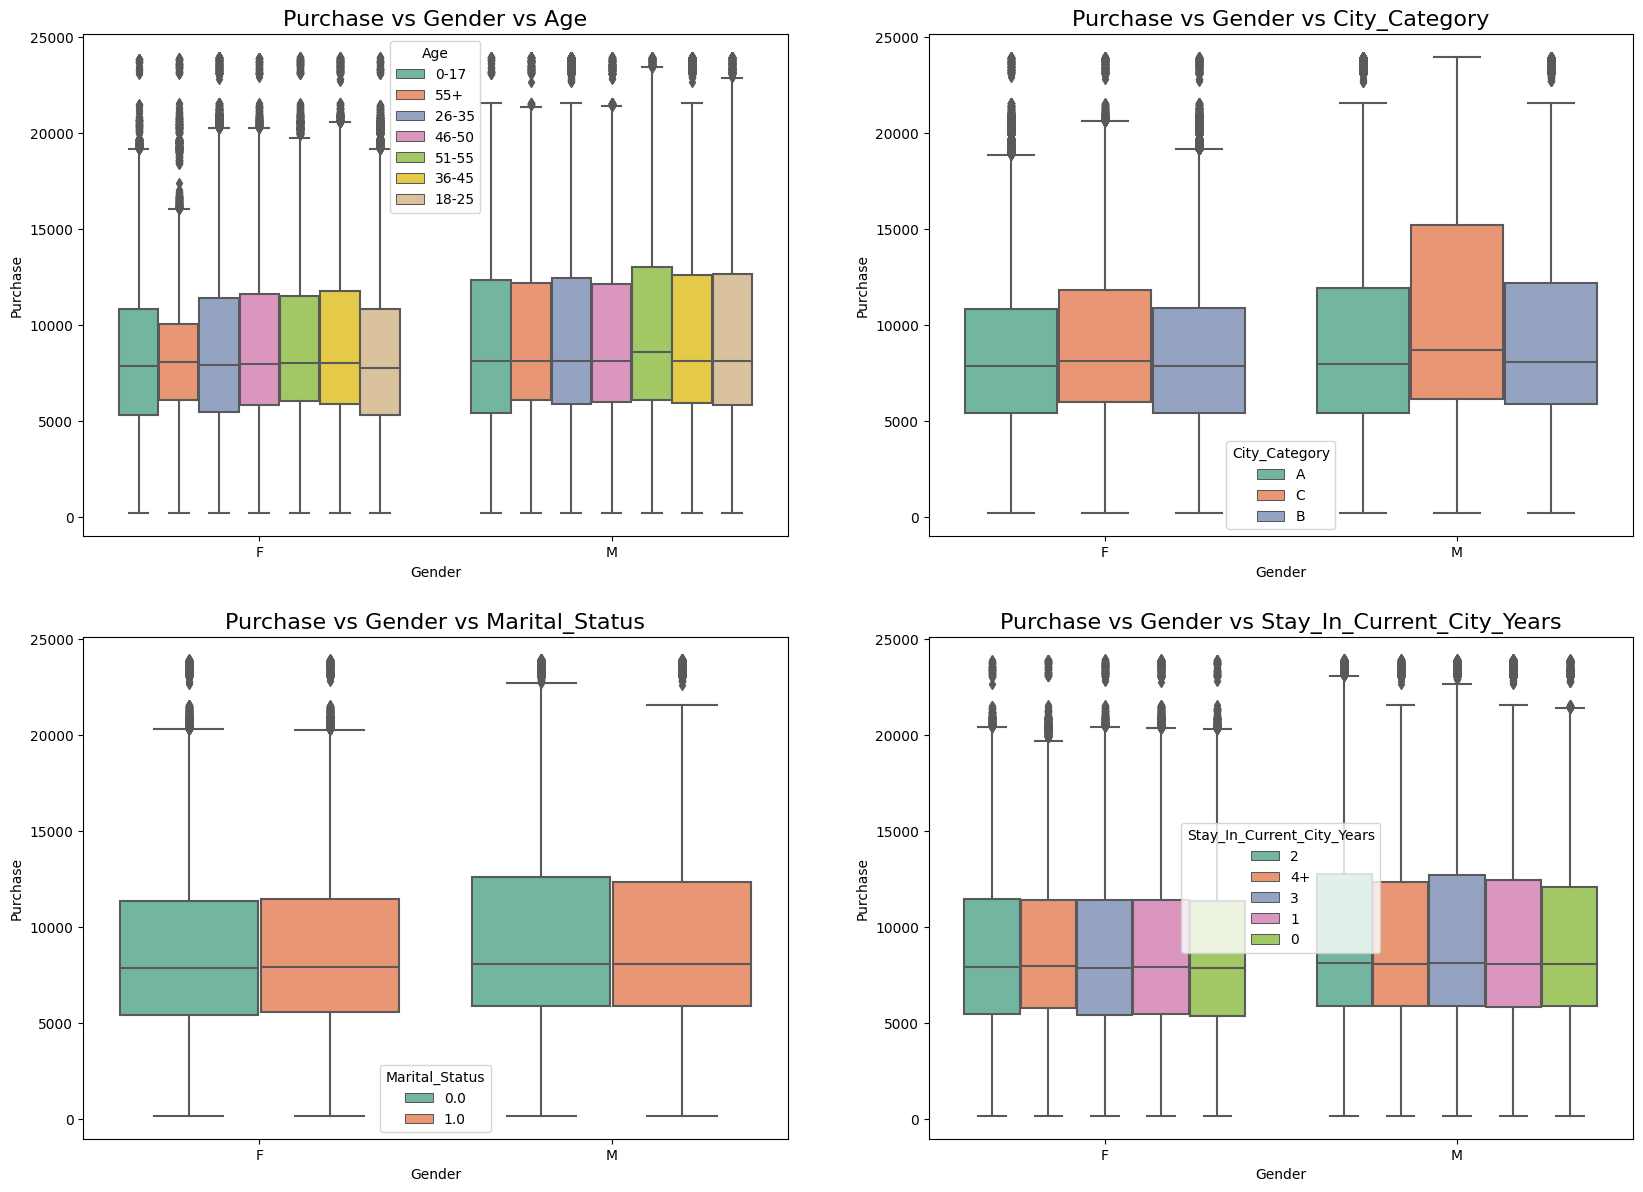

In [469]:
multivar_columns = ['Age','City_Category','Marital_Status','Stay_In_Current_City_Years']

plt.figure(figsize = (20,30))
count = 0
for i in range(len(multivar_columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data = df, x = 'Gender', y= 'Purchase',hue = multivar_columns[i], palette = 'Set2')
    plt.title(f'Purchase vs Gender vs {multivar_columns[count]}', fontsize = 16)
    count += 1
    

In [471]:
df_new = df.copy()

In [472]:
df_new.dropna(inplace = True)

In [473]:
df_new['Gender'] = df_new['Gender'].replace(('M','F'),(0,1))
df_new['Age'] = df_new['Age'].replace(('0-17','18-25','26-35','36-45','46-50','51-55','55+'),(17,25,35,45,50,51,55))
df_new['City_Category'] = df_new['City_Category'].replace(('A','B','C'),(1,2,3))
df_new['Stay_In_Current_City_Years'] = df_new['Stay_In_Current_City_Years'].replace(('0','1','2','3','4+'),(0,1,2,3,4))


In [474]:
num_variables = df_new[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']]

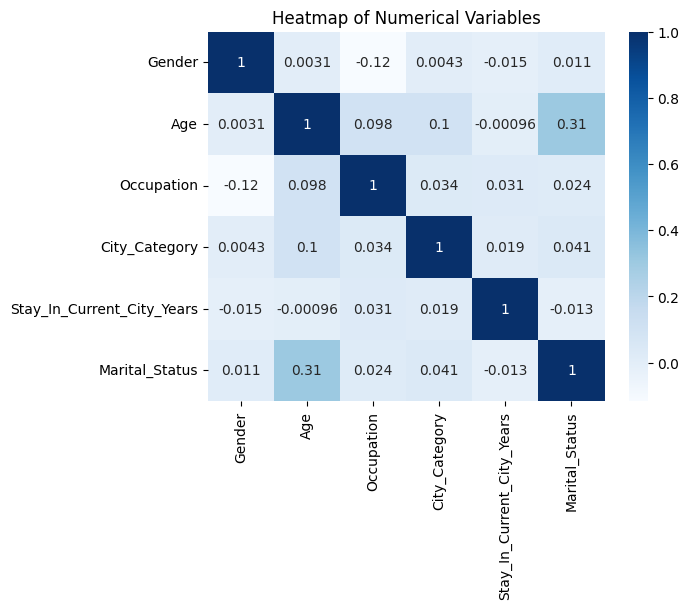

In [475]:
sns.heatmap(num_variables.corr(),cmap= 'Blues', annot = True)
plt.title('Heatmap of Numerical Variables')
plt.show()

## 2. Missing Value & Outlier Detection

In [476]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [477]:
df_new.describe(include = 'all').loc['mean'] - df.describe(include = 'all').loc['50%']

User_ID                        -39.231325
Product_ID                            NaN
Gender                                NaN
Age                                   NaN
Occupation                       1.082586
City_Category                         NaN
Stay_In_Current_City_Years            NaN
Marital_Status                   0.409033
Product_Category                 0.298599
Purchase                      1270.412173
dtype: object

In [478]:
num_variables.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
count,500862.000000,500862.000000,500862.000000,500862.000000,500862.000000,500862.000000
mean,0.245946,37.837762,8.082586,2.040816,1.858801,0.409033
std,0.430647,9.549895,6.524057,0.759560,1.289791,0.491656
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,35.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,35.000000,7.000000,2.000000,2.000000,0.000000
75%,0.000000,45.000000,14.000000,3.000000,3.000000,1.000000
max,1.000000,55.000000,20.000000,3.000000,4.000000,1.000000


In [479]:
def outlier_detection(col):
    upper_range = num_variables[col].quantile(0.75)
    lower_range = num_variables[col].quantile(0.25)
    iqr = upper_range - lower_range
    return len(num_variables[(num_variables[col] > upper_range + 1.5*iqr) | (num_variables[col] < lower_range - 1.5*iqr)])



In [480]:
print('Number of Outliers')
for i in num_variables.columns:
    print(f"{i}: {outlier_detection(i)}")

Number of Outliers
Gender: 123185
Age: 13725
Occupation: 0
City_Category: 0
Stay_In_Current_City_Years: 0
Marital_Status: 0


## Observations:
1. We can see that only one row has null value in the columns - Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase.
2. We can see that there is a big difference between Mean and Median Purchase of 1270. Rest of the features have almost negligible difference meaning that there are really less outliers in the data in non-categorical data.
3. From the above Outlier detection function, after converting categorical variable into numerical variable, we can see that the Age and Gender have quite a lot of outliers.

## Business Insights based on Non- Graphical and Visual Analysis

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500863 entries, 0 to 500862
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     500863 non-null  int64  
 1   Product_ID                  500863 non-null  object 
 2   Gender                      500863 non-null  object 
 3   Age                         500863 non-null  object 
 4   Occupation                  500863 non-null  int64  
 5   City_Category               500863 non-null  object 
 6   Stay_In_Current_City_Years  500862 non-null  object 
 7   Marital_Status              500862 non-null  float64
 8   Product_Category            500862 non-null  float64
 9   Purchase                    500862 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 38.2+ MB


In [482]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.008630e+05,500863,500863,500863,500863.000000,500863,500862,500862.000000,500862.000000,500862.000000
unique,NaN,3612,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1712,377678,199687,NaN,211065,176309,NaN,NaN,NaN
mean,1.002998e+06,NaN,NaN,NaN,8.082593,NaN,NaN,0.409033,5.298599,9331.412173
std,1.714654e+03,NaN,NaN,NaN,6.524053,NaN,NaN,0.491656,3.751217,4980.083494
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,185.000000
25%,1.001497e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5866.000000
50%,1.003037e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8061.000000
75%,1.004430e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12070.000000


## Attributes in our data: 

1. We can see that all the customers have a User_ID which is a unique ID.
2. Product_ID is also a unique ID assigned to a product that Walmart sells. The most sold product is P00265242.
3. Gender is given in M or F. There are mostly male customers in our data.
4. Age is given in the ranges for example 0-17, 18-25, 55+ etc. The most common age range we see in our data is 26-35.
5. Occupation is masked so it's hard to infer anything from this feature.
6. City categories are given in A, B and C. The most common occuring city in our data is B.
7. Products have different categories and have around 17 unique categories in our dataset.

In [483]:
df['Product_Category'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

## Distribution of the variables and relationship between them.

1. As we can see that product_id and user_id are unique. Each user_id can buy different products and can have different product_ids assigned.
2. We can see that the Gender and Marital status only have two values M or F and 0 or 1, 0 meaning unmarried and 1 meaning married.
3. Product_ID and product_category are related, because every product will come under a category.

## Observations on Univariate and Bivariate analysis:

Univariate:
1. From the Gender Analysis, we can see that there are more Male customers than Female customers.
2. Age Analysis plot shows us that the maximum customers are from 26.35 age bracket, followed by 36-45 and 18-25.
3. We can infer from Occupation analysis plot that the highest occupation category is 4, followed by 0 and 7.
4. From City_Category_Analysis, we can observe that the people tend to live more in city B followed by city C.
5. From Stay_In_Current_City, Years_Analysis we can see that people don't tend to stay longer than 1 year in their current city. 
6. There are more unmarried customers than the married ones.
7. The sales of the product category 5 is the most. 2nd highest sales of the type of product category is 1 followed by 8 which is the 3rd most sold category of the product.

Bivariate:
1. We can see that the customers buy the category 1 product the most.
2. From the Age_Category vs Purchase plot, we can see that the highest purchase was made by the 26-35 age category.
3. Male customers have the highest purchase from Walmart.
4. Customers with occupation rating of 4 has the highest number of purchases followed by 0 type and then type 7 occupation rating.
5. The highest purchase was made by the City Category of B. 2nd most purchase was made by city category of C.
6. Unmarried customers have made the most purchases from Walmart than married customers.



## 4. Answering questions 

### 4.1 Are women spending more money per transaction than men? Why or Why not?

In [5]:
amt_df = df.groupby(['User_ID','Gender'])[['Purchase']].sum()

amt_df = amt_df.reset_index()

amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [6]:
avg_purchase_male = amt_df[amt_df['Gender'] == 'M']['Purchase'].mean()
avg_purchase_female = amt_df[amt_df['Gender'] == 'F']['Purchase'].mean()

print("Average money spent by Males = {:.2f}".format(avg_purchase_male))
print("Average money spent by Females = {:.2f}".format(avg_purchase_female))

Average money spent by Males = 849439.25
Average money spent by Females = 651181.84


## Observation:
Male customers spend more money than females customers. This could be because of two reasons:
1. There are more male customers than female customers, hence the male customers will tend to buy more than female customers.
2. There could be more products suited to males than the female products which could lead to increase in sales of the products bought by men.


### 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [7]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [8]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

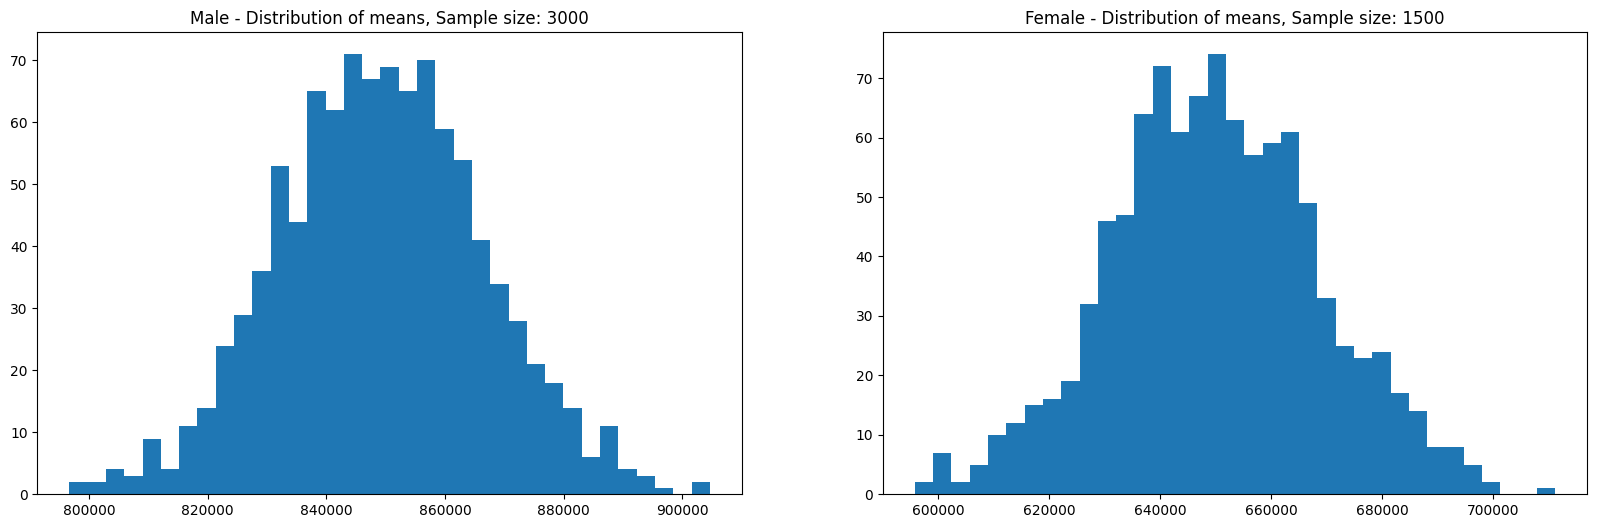

In [488]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [489]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))



Population mean - Mean of sample means of amount spend for Male: 849160.16
Population mean - Mean of sample means of amount spend for Female: 649983.75

Male - Sample mean: 849439.25 Sample std: 908781.55
Female - Sample mean: 651181.84 Sample std: 739839.31


### Observation

Now using the Central Limit Theorem for the population we can say that:

1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

In [490]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (822035.99, 876842.50)
Female confidence interval of means: (615655.05, 686708.63)


### Now we can infer about the population that, 95% of the times:

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

### Doing the same activity for married vs unmarried

In [491]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0.0,325291.0
1,1000002,0.0,742268.0
2,1000003,0.0,322004.0
3,1000004,1.0,186999.0
4,1000005,1.0,732184.0
...,...,...,...
5886,1006036,1.0,3407617.0
5887,1006037,0.0,1002513.0
5888,1006038,0.0,60947.0
5889,1006039,1.0,554504.0


In [492]:
amt_df['Marital_Status'].value_counts()

0.0    3417
1.0    2474
Name: Marital_Status, dtype: int64

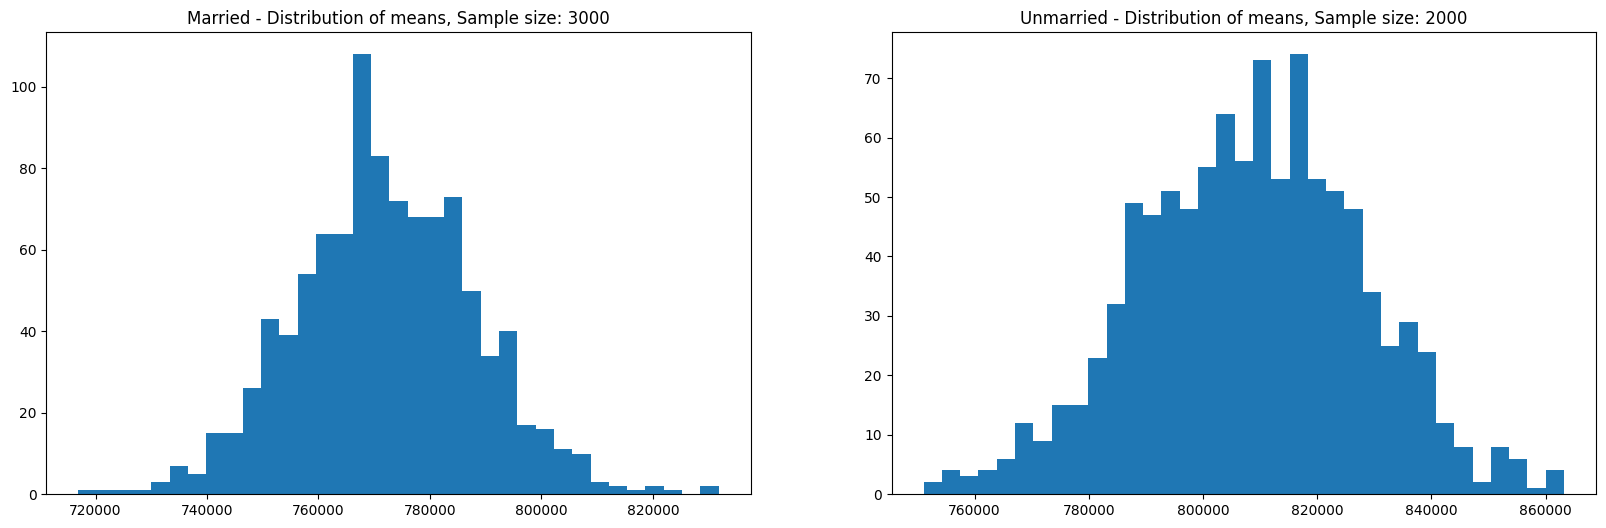

Population mean - Mean of sample means of amount spend for Married: 772204.06
Population mean - Mean of sample means of amount spend for Unmarried: 808320.31

Married - Sample mean: 772467.03 Sample std: 858226.94
Unmarried - Sample mean: 808506.39 Sample std: 876357.39


In [493]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [494]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (738648.21, 806285.84)
Unmarried confidence interval of means: (779122.13, 837890.66)


### Calculating the average amount spent by Age

In [495]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,325291.0
1,1000002,55+,742268.0
2,1000003,26-35,322004.0
3,1000004,46-50,186999.0
4,1000005,26-35,732184.0
...,...,...,...
5886,1006036,26-35,3407617.0
5887,1006037,46-50,1002513.0
5888,1006038,55+,60947.0
5889,1006039,46-50,554504.0


In [496]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [497]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [498]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (864543.69, 946601.02)
For age 36-45 --> confidence interval of means: (756044.16, 859882.13)
For age 18-25 --> confidence interval of means: (737015.73, 835214.98)
For age 46-50 --> confidence interval of means: (652746.49, 797866.84)
For age 51-55 --> confidence interval of means: (636850.58, 767813.89)
For age 55+ --> confidence interval of means: (437217.89, 553899.74)
For age 0-17 --> confidence interval of means: (484813.58, 653277.11)


## Insights
~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
75% of the users are Male and 25% are Female
60% Single, 40% Married
35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
Total of 20 product categories are there
There are 20 differnent types of occupations in the city


Most of the users are Male
There are 20 different types of Occupation and Product_Category
More users belong to B City_Category
More users are Single as compare to Married
Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.


Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39

### Confidence Interval by Gender
Now using the Central Limit Theorem for the population:

1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

Now we can infer about the population that, 95% of the times:

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

### Confidence Interval by Marital_Status
1. Married confidence interval of means: (806668.83, 880384.76)
2. Unmarried confidence interval of means: (848741.18, 912410.38)


### Confidence Interval by Age
1. For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
2. For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
3. For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
4. For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
5. For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
6. For age 55+ --> confidence interval of means: (476948.26, 602446.23)
7. For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

## Recommendations
1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.